# Weather Data Analysis Project - Programming for Data Analytics

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## Project Outline

### Minimum project
 - Read in a number of good data sets

 - Analyse the data using various techniques (from what we've learned in the module)

 - Nice-looking plots to illustrate my findings

 - *For more marks, add:* Increased range of data, scikitlearn and other packages, meaningful insights, increase complexity of plots but keep readability

### Questions I can answer:
 - How much wind power is there at a particular location?

 - This is quite open ended, is this just the mean wind speed for
an hour/day/month/year, or should you take into account that
there are wind ranges that the windfarms can operate in. (min
max speeds)

 - Some analysis of what power when would be useful (time of
day/year)

 - Are the wind speeds likely to be the same in 10 years in the future? ie
is there a trend in recorded wind speeds over the last few decades.

 - Is there any other weather metric worth analyzing (eg rain, temp)

 - What will the power output of the windfarms in Ireland be like next
week, according to the weather forecasts? (ok that is a tricky one,
because you would need to get, or make up, information about the
size and locations of the wind farms in Ireland, one find/makeup the
windspeed to power output equation.

 - Anything else you can think of?

# Layout of the Project
1. Retrieve the Dataset
2. Clean the Dataset
3. Analyse the Dataset
 - **(a)** Mean Wind Speed
 - **(b)** Max Wind Speed
 - **(c)** Min Wind Speed
 - **(d)** Wind Speed by Month
 - **(e)** Making Predictions
 - **(f)** Correlation matrix - rain, temp, vis, wdsp

## 1. Retrieve the Dataset

### (a) Shannon Airport

I sourced my dataset from Met Éireann [https://www.met.ie/climate/available-data/historical-data]

I saved the dataset as `shannon.csv` - this CSV file gives the hourly weather data in Shannon Airport from 1945 to 2025.

In [2]:
# Filename & Data Directory
filename = "shannon_data.csv"

# Read in CSV file
df_s = pd.read_csv(filename, skiprows=23)

df_s.head()

C:\Users\ZMH\AppData\Local\Temp\ipykernel_1260\1365716384.py:5: DtypeWarning: Columns (6,12,14,15,16,18,19,20) have mixed types. Specify dtype option on import or set low_memory=False.
  df_s = pd.read_csv(filename, skiprows=23)


,date,ind,rain,ind.1,temp,ind.2,wetb,dewpt,vappr,rhum,...,ind.3,wdsp,ind.4,wddir,ww,w,sun,vis,clht,clamt
0,01-sep-1945 01:00,0,0.1,0,15.3,0,14.6,14.4,16.0,92,...,1,17,1,90,50,6,0.0,7000,16,8
1,01-sep-1945 02:00,2,0.0,0,15.0,0,14.6,14.4,16.4,95,...,1,17,1,90,51,5,0.0,7000,9,8
2,01-sep-1945 03:00,0,0.1,0,15.0,0,14.6,14.4,16.4,95,...,1,17,1,100,51,6,0.0,7000,9,8
3,01-sep-1945 04:00,2,0.0,0,15.0,0,14.4,13.8,16.0,94,...,1,14,1,90,20,5,0.0,7000,9,8
4,01-sep-1945 05:00,0,0.0,0,15.0,0,14.5,14.4,16.1,95,...,1,16,1,110,2,2,0.0,10000,17,7


### (b) Dublin Airport

In [3]:
# Filename & Data Directory
filename = "dublin_data.csv"

# Read in CSV file
df_d = pd.read_csv(filename, skiprows=23)

df_d.head()

C:\Users\ZMH\AppData\Local\Temp\ipykernel_1260\1252321557.py:5: DtypeWarning: Columns (8,9,14,18,19,20) have mixed types. Specify dtype option on import or set low_memory=False.
  df_d = pd.read_csv(filename, skiprows=23)


,date,ind,rain,ind.1,temp,ind.2,wetb,dewpt,vappr,rhum,...,ind.3,wdsp,ind.4,wddir,ww,w,sun,vis,clht,clamt
0,01-jan-1945 00:00,2,0.0,0,4.9,0,4.6,4.4,8.2,95,...,1,0,1,0,50,4,0.0,200,2,8
1,01-jan-1945 01:00,3,0.0,0,5.1,0,4.9,4.4,8.5,97,...,1,0,1,0,45,4,0.0,200,2,8
2,01-jan-1945 02:00,2,0.0,0,5.1,0,4.8,4.4,8.5,97,...,1,0,1,0,50,4,0.0,4800,4,8
3,01-jan-1945 03:00,0,0.2,0,5.2,0,5.0,4.4,8.5,97,...,1,0,1,0,50,4,0.0,6000,4,8
4,01-jan-1945 04:00,2,0.0,0,5.6,0,5.4,5.0,8.8,97,...,1,7,1,250,50,5,0.0,6000,4,8


## 2. Clean the Dataset

I found some empty strings in the wdsp column when trying to plot. I used the `strip()` and the `df.dropna()` method to clean this column.

In [4]:
# Remove empty strings and convert to numeric
df_s['wdsp'] = pd.to_numeric(df_s['wdsp'].astype(str).str.strip(), errors='coerce')

# Drop rows where wdsp couldn't be converted
df_s = df_s.dropna(subset=['wdsp'])
df_s.head()

,date,ind,rain,ind.1,temp,ind.2,wetb,dewpt,vappr,rhum,...,ind.3,wdsp,ind.4,wddir,ww,w,sun,vis,clht,clamt
0,01-sep-1945 01:00,0,0.1,0,15.3,0,14.6,14.4,16.0,92,...,1,17.0,1,90,50,6,0.0,7000,16,8
1,01-sep-1945 02:00,2,0.0,0,15.0,0,14.6,14.4,16.4,95,...,1,17.0,1,90,51,5,0.0,7000,9,8
2,01-sep-1945 03:00,0,0.1,0,15.0,0,14.6,14.4,16.4,95,...,1,17.0,1,100,51,6,0.0,7000,9,8
3,01-sep-1945 04:00,2,0.0,0,15.0,0,14.4,13.8,16.0,94,...,1,14.0,1,90,20,5,0.0,7000,9,8
4,01-sep-1945 05:00,0,0.0,0,15.0,0,14.5,14.4,16.1,95,...,1,16.0,1,110,2,2,0.0,10000,17,7


## 3. Analyse the Dataset

### **(a).** Mean Wind Speed

I want to analyse windspeed first and foremost, so I will drop the other columns.

I also made the index a datetime object.

In [5]:
# Make index datetime
df_s['date'] = pd.to_datetime(df_s['date'], format="%d-%b-%Y %H:%M")
df_s = df_s.set_index('date')

The column `wdsp` shows the hourly mean wind speed in knots. I will plot this information, resampling to find the daily, monthly and yearly averages.

In [6]:
hourly_wdsp_s = df_s['wdsp']

#### Hourly **Mean** Wind Speed 

I first plotted the hourly mean wind speed as this doesn't require much manipulation of the dataset.

I looked at the documentation for `pd.date_range` as I wasn't happy with the original spacing of the years. [See: https://pandas.pydata.org/docs/reference/api/pandas.date_range.html]

I also asked ChatGPT for help with the formatting of the datetime x ticks [See:https://chatgpt.com/share/693177e4-c100-800c-a547-01ab88af2e68]

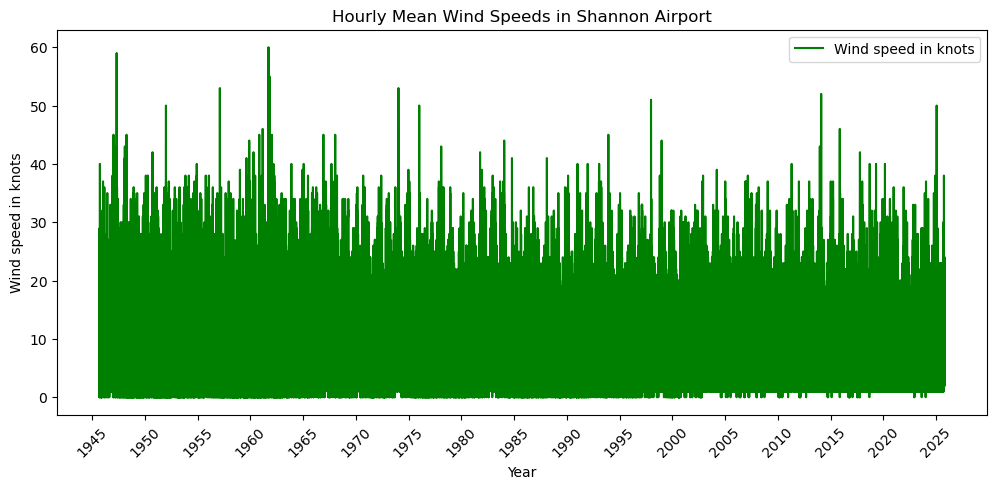

<Figure size 640x480 with 0 Axes>

In [7]:
# Plotting
fig, ax = plt.subplots(figsize=(12,5))
ax.plot(hourly_wdsp_s, label='Wind speed in knots', color='green')
plt.xlabel('Year')
plt.ylabel('Wind speed in knots')
# Set ticks to be just the years, every 5 years
ticks = pd.date_range(start='1945', periods = 17, freq='5YS')
plt.xticks(ticks, ticks.strftime('%Y'), rotation=45)
plt.title('Hourly Mean Wind Speeds in Shannon Airport')
plt.legend()
plt.show()
plt.savefig('Plots/hourly_wdsp_shannon.png')

#### Daily, Monthly and Yearly **Mean** Wind Speed

To find the daily/monthly/yearly mean wdsp, instead of the given hourly mean wdsp, I used the `df.resample().mean()` method [See Pandas documentation: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.resample.html]

In [8]:
daily_wdsp_s = df_s['wdsp'].resample("D").mean()

In [9]:
monthly_wdsp_s = df_s['wdsp'].resample("MS").mean()

In [10]:
yearly_wdsp_s = df_s['wdsp'].resample("YS").mean()

I wanted to plot these three series on one figure for easier analysis.

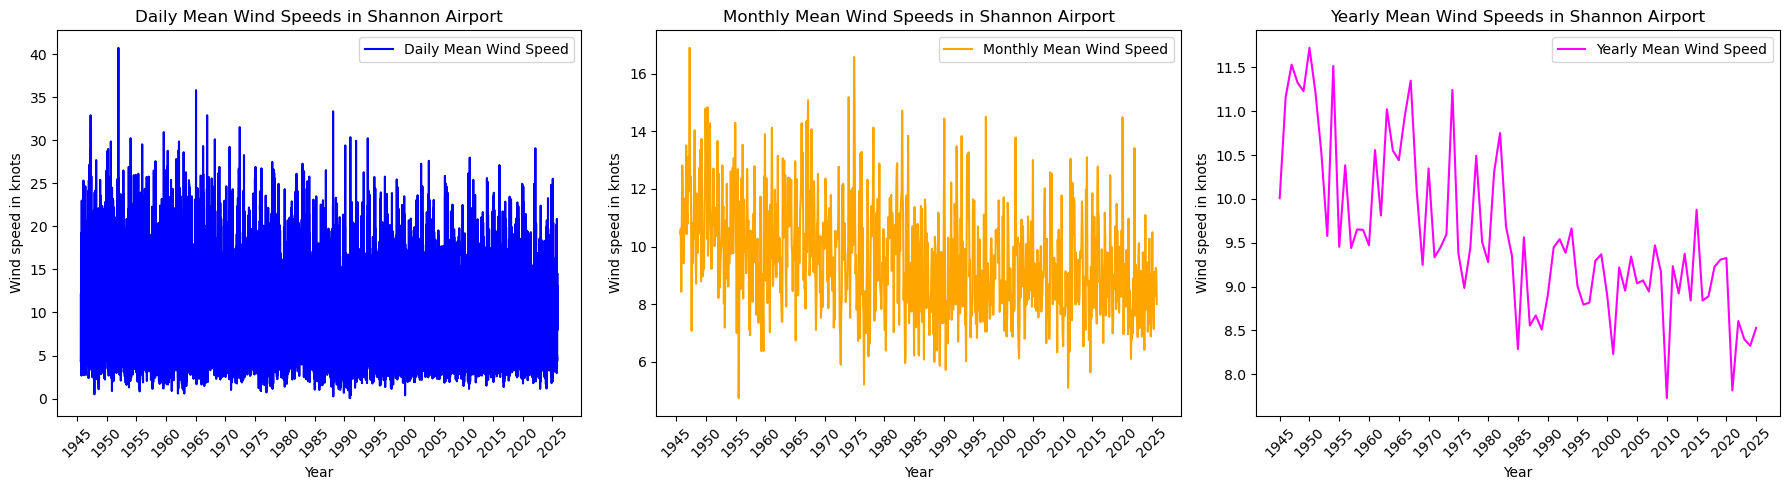

<Figure size 640x480 with 0 Axes>

In [11]:
# Multiple plots on one figure to show mean wind speeds at different time scales
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(18,5))

# Plot daily mean wind speed
ax1.plot(daily_wdsp_s, label='Daily Mean Wind Speed', color='blue')
ax1.set_title('Daily Mean Wind Speeds in Shannon Airport')
ax1.set_xlabel('Year')
ax1.set_ylabel('Wind speed in knots')
ticks = pd.date_range(start='1945', periods = 17, freq='5YS')
ax1.set_xticks(ticks)
ax1.set_xticklabels(ticks.strftime('%Y'), rotation=45)
ax1.legend()

# Plot monthly mean wind speed
ax2.plot(monthly_wdsp_s, label='Monthly Mean Wind Speed', color='orange')
ax2.set_title('Monthly Mean Wind Speeds in Shannon Airport')
ax2.set_xlabel('Year')
ax2.set_ylabel('Wind speed in knots')
ticks = pd.date_range(start='1945', periods = 17, freq='5YS')
ax2.set_xticks(ticks)
ax2.set_xticklabels(ticks.strftime('%Y'), rotation=45)
ax2.legend()

# Plot yearly mean wind speed
ax3.plot(yearly_wdsp_s, label='Yearly Mean Wind Speed', color='magenta')
ax3.set_title('Yearly Mean Wind Speeds in Shannon Airport')
ax3.set_xlabel('Year')
ax3.set_ylabel('Wind speed in knots')
ticks = pd.date_range(start='1945', periods = 17, freq='5YS')
ax3.set_xticks(ticks)
ax3.set_xticklabels(ticks.strftime('%Y'), rotation=45)
ax3.legend()
plt.tight_layout()
plt.show()
plt.savefig('Plots/mean_wdsp_shannon_daily_monthly_yearly.png')

The above plots show that, generally, mean wind speeds are lower now than they were 80 years ago. The yearly mean wind speeds plot is the clearest depiction of this, while the daily mean wdsp plot has a large amount of data points and isn't as easy to interpret. The monthly plot also shows a general downwards trend but we can see some outliers (some month in 1956 shows a very low mean wdsp).

### **(b)** Max Wind Speed

#### Daily, Monthly and Yearly **Max** Wind Speed

To find the maximum windspeed over different timescales, I used the `df.resample().max()` method.

In [12]:
daily_max_wdsp_s = df_s['wdsp'].resample("D").max()
monthly_max_wdsp_s = df_s['wdsp'].resample("MS").max()
yearly_max_wdsp_s = df_s['wdsp'].resample("YS").max()

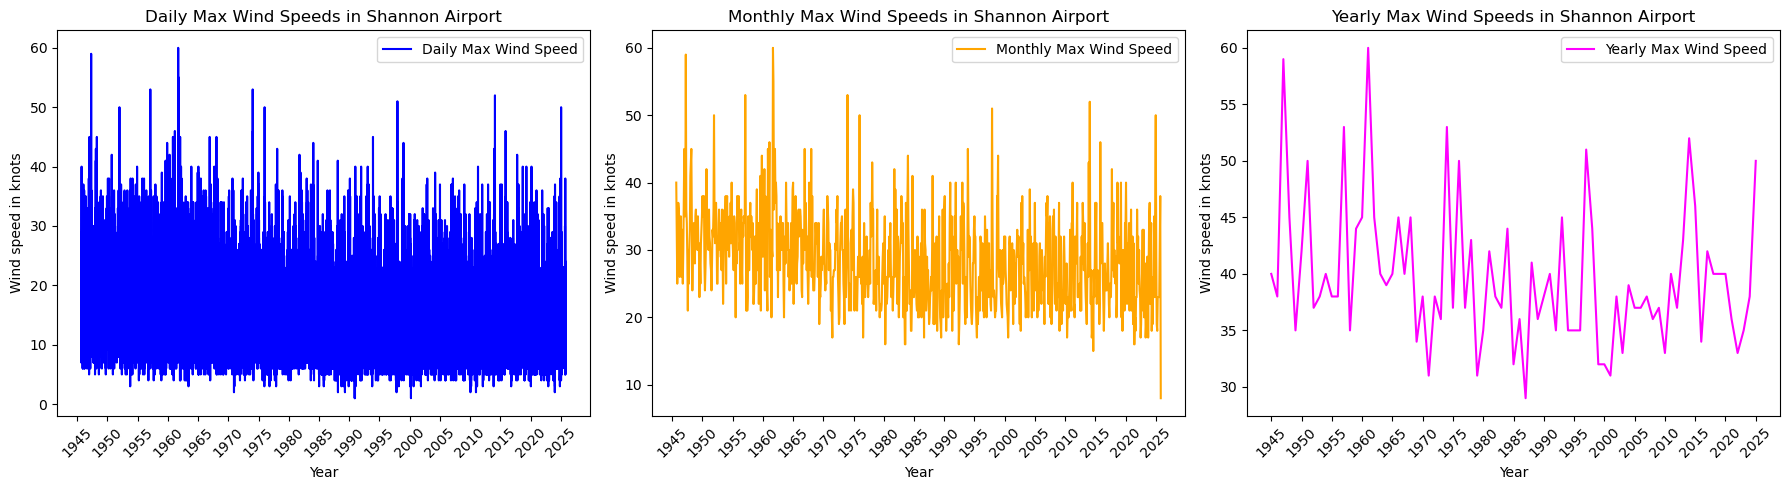

<Figure size 640x480 with 0 Axes>

In [13]:
# Plot of daily, monthly and yearly maximum wind speeds
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(18,5))

# Plot daily max wind speed
ax1.plot(daily_max_wdsp_s, label='Daily Max Wind Speed', color='blue')
ax1.set_title('Daily Max Wind Speeds in Shannon Airport')
ax1.set_xlabel('Year')
ax1.set_ylabel('Wind speed in knots')
ticks = pd.date_range(start='1945', periods = 17, freq='5YS')
ax1.set_xticks(ticks)
ax1.set_xticklabels(ticks.strftime('%Y'), rotation=45)
ax1.legend()

# Plot monthly max wind speed
ax2.plot(monthly_max_wdsp_s, label='Monthly Max Wind Speed', color='orange')
ax2.set_title('Monthly Max Wind Speeds in Shannon Airport')
ax2.set_xlabel('Year')
ax2.set_ylabel('Wind speed in knots')
ticks = pd.date_range(start='1945', periods = 17, freq='5YS')
ax2.set_xticks(ticks)
ax2.set_xticklabels(ticks.strftime('%Y'), rotation=45)
ax2.legend()

# Plot yearly max wind speed
ax3.plot(yearly_max_wdsp_s, label='Yearly Max Wind Speed', color='magenta')
ax3.set_title('Yearly Max Wind Speeds in Shannon Airport')
ax3.set_xlabel('Year')
ax3.set_ylabel('Wind speed in knots')
ticks = pd.date_range(start='1945', periods = 17, freq='5YS')
ax3.set_xticks(ticks)
ax3.set_xticklabels(ticks.strftime('%Y'), rotation=45)
ax3.legend()

plt.tight_layout()
plt.show()
plt.savefig('Plots/max_wdsp_shannon_daily_monthly_yearly.png')

Although the above plots suggest that the wind speeds have reduced in the past 80 years, it could be argued that there are more buildings around Shannon Airport which block the wind and slow it down. ![alt text](<Screenshot 2025-12-03 212455.png>) Shannon Airport in 1959 ![alt text](ShannonAirport-696x464.jpg) A more recent photo of Shannon Airport

### **(c)** Min Wind Speed

In [14]:
daily_min_wdsp_s = df_s['wdsp'].resample("D").min()
monthly_min_wdsp_s = df_s['wdsp'].resample("MS").min()
yearly_min_wdsp_s = df_s['wdsp'].resample("YS").min()

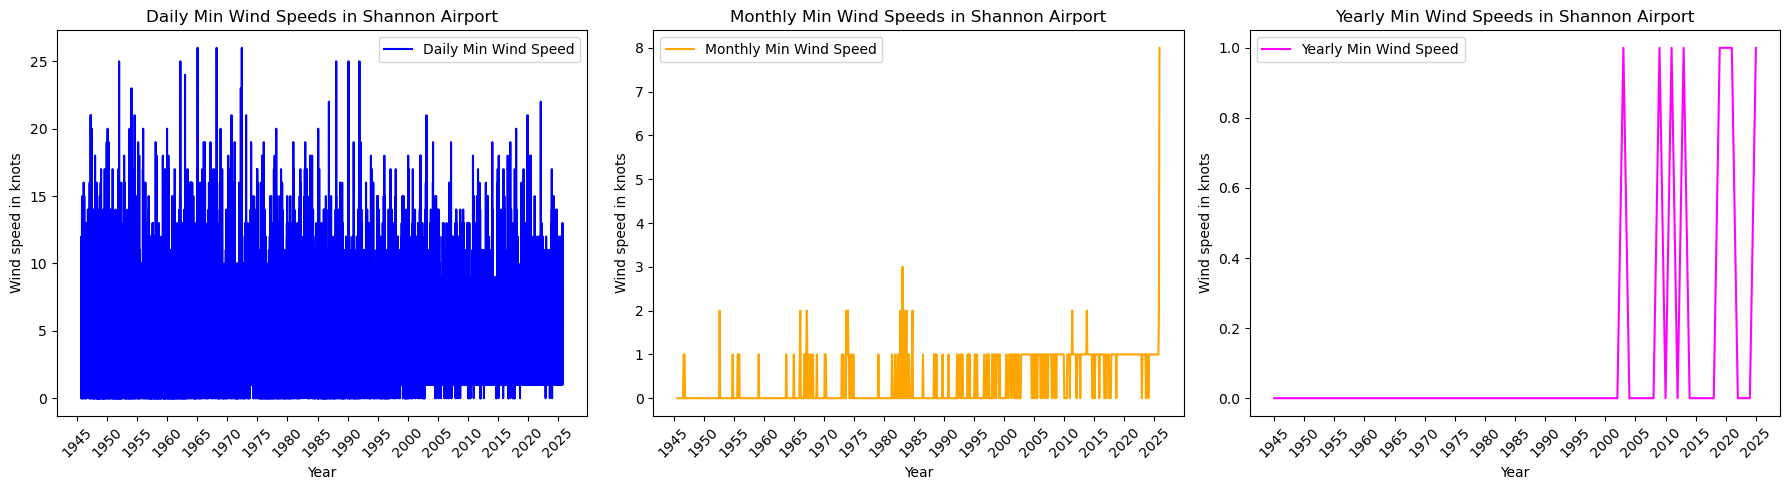

<Figure size 640x480 with 0 Axes>

In [15]:
# Plot of daily, monthly and yearly minimum wind speeds
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(18,5))

# Plot daily min wind speed
ax1.plot(daily_min_wdsp_s, label='Daily Min Wind Speed', color='blue')
ax1.set_title('Daily Min Wind Speeds in Shannon Airport')
ax1.set_xlabel('Year')
ax1.set_ylabel('Wind speed in knots')
ticks = pd.date_range(start='1945', periods = 17, freq='5YS')
ax1.set_xticks(ticks)
ax1.set_xticklabels(ticks.strftime('%Y'), rotation=45)
ax1.legend()

# Plot monthly min wind speed
ax2.plot(monthly_min_wdsp_s, label='Monthly Min Wind Speed', color='orange')
ax2.set_title('Monthly Min Wind Speeds in Shannon Airport')
ax2.set_xlabel('Year')
ax2.set_ylabel('Wind speed in knots')
ticks = pd.date_range(start='1945', periods = 17, freq='5YS')
ax2.set_xticks(ticks)
ax2.set_xticklabels(ticks.strftime('%Y'), rotation=45)
ax2.legend()

# Plot yearly min wind speed
ax3.plot(yearly_min_wdsp_s, label='Yearly Min Wind Speed', color='magenta')
ax3.set_title('Yearly Min Wind Speeds in Shannon Airport')
ax3.set_xlabel('Year')
ax3.set_ylabel('Wind speed in knots')
ticks = pd.date_range(start='1945', periods = 17, freq='5YS')
ax3.set_xticks(ticks)
ax3.set_xticklabels(ticks.strftime('%Y'), rotation=45)
ax3.legend()

plt.tight_layout()
plt.show()
plt.savefig('Plots/min_wdsp_shannon_daily_monthly_yearly.png')

These plots are harder to interpret. The monthly and yearly min wdsp plots show that there were numerous months/years where windspeed fell to 0 knots. 

### **(d)** Wind Speed by Month

I am interested in seeing if there is any significant difference between the mean wind speeds each month.

I asked ChatGPT how to group the months together and learned about the `groupby()` method. [See: https://chatgpt.com/share/693177e4-c100-800c-a547-01ab88af2e68]

C:\Users\ZMH\AppData\Local\Temp\ipykernel_1260\3681223431.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monthly_means_s = df_s.groupby('month')['wdsp'].mean()


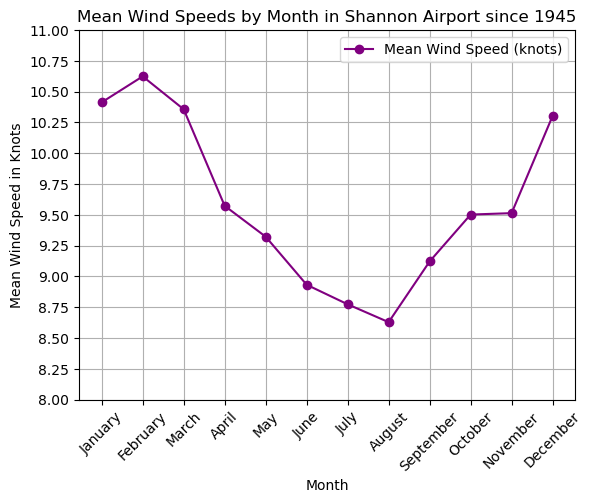

<Figure size 640x480 with 0 Axes>

In [16]:
# Divide wdsp column into categories based on months
df_s['month'] = df_s['month'] = pd.Categorical(
    df_s.index.month_name(),
    categories=[
        'January','February','March','April','May','June',
        'July','August','September','October','November','December'
    ],
    ordered=True
)

# Wasn't sure how to group the months so asked ChatGPT to find the groupby() method
monthly_means_s = df_s.groupby('month')['wdsp'].mean()

plt.plot(monthly_means_s.index, monthly_means_s.values, marker='o', label='Mean Wind Speed (knots)', color='purple')
plt.xlabel('Month')
plt.ylabel('Mean Wind Speed in Knots')
plt.title('Mean Wind Speeds by Month in Shannon Airport since 1945')
plt.xticks(rotation=45)
plt.yticks(np.arange(8, 11.25, 0.25))
plt.legend()
plt.grid()
plt.show()
plt.savefig('Plots/mean_wdsp_by_month.png')

The above plot shows us that there is a clear decrease in wind speed as it goes from winter into summer. August shows the lowest average wind speed every year since 1945. The mean wind speed then increases from September, reaching it's highest average speed in February.

### **(e)** Making Predictions

### **(f)** Correlation Matrix